<a href="https://colab.research.google.com/github/dangtrantrung/TensorFlow_Keras/blob/master/TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
import tensorflow
from tensorflow import keras
print(keras)

<KerasLazyLoader>


In [ ]:
import tensorflow  as tf
# Conv2D
input_shape=(4,30,30,3)
x=tf.random.normal(input_shape)
y=tf.keras.layers.Conv2D(2,3,activation='relu',input_shape=input_shape[1:])(x)
print(y.shape)


(4, 28, 28, 2)


In [ ]:
# CNN model
inputs=keras.layers.Input(shape=[32,32,3])
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(inputs)
x=keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu')(x)
predictions=keras.layers.MaxPool2D(pool_size=2)(x)

model=keras.Model(inputs=inputs,outputs=predictions)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144 (39.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions.shape

TensorShape([None, 16, 16, 32])

In [ ]:
inputs.shape

TensorShape([None, 32, 32, 3])

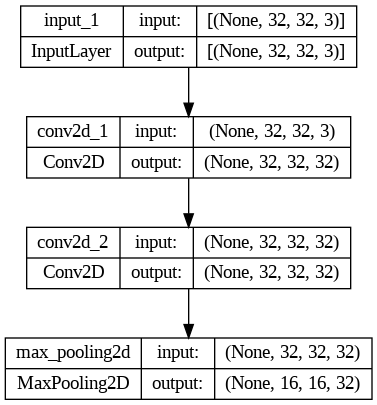

In [ ]:
keras.utils.plot_model(model,'model.png',show_shapes=True)

In [ ]:
# Model Sequential
model_v1=tf.keras.Sequential([
    keras.layers.Dense(1024,input_dim=64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256),
    keras.layers.Activation('softmax')]
)

In [ ]:
model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              66560     
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
Total params: 328960 (1.25 MB)
Trainable params: 328960 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_v1.inputs

[<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_input')>]

In [ ]:
model_v1.outputs

[<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'activation_1')>]

In [ ]:
model_v2=tf.keras.Sequential()
model_v2.add( keras.layers.Dense(1024,input_dim=64))
model_v2.add( keras.layers.Activation('relu'))
model_v2.add(keras.layers.Dense(256,activation='softmax',kernel_initializer='random_normal'))
model_v2.add(keras.layers.Dense(10,activation='softmax',kernel_initializer='random_normal'))

model_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              66560     
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 331530 (1.26 MB)
Trainable params: 331530 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_v2.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

In [ ]:
# Sample Data

data=np.random.random((2000,64))
label=np.random.random((2000,10))

valid_data=np.random.random((500,64))
valid_label=np.random.random((500,10))

test_data=np.random.random((500,64))
test_label=np.random.random((500,10))


In [ ]:
data.shape, type(model_v2)

((2000, 64), keras.src.engine.sequential.Sequential)

In [ ]:
model_v2.fit(data, label, epochs=100, batch_size=50, validation_data=(valid_data, valid_label))

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 11.5572 - accuracy: 0.0925 - val_loss: 11.4463 - val_accuracy: 0.0920
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5569 - accuracy: 0.1000 - val_loss: 11.4463 - val_accuracy: 0.0920
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5567 - accuracy: 0.0975 - val_loss: 11.4464 - val_accuracy: 0.0900
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5566 - accuracy: 0.0980 - val_loss: 11.4465 - val_accuracy: 0.1220
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 11.5565 - accuracy: 0.0990 - val_loss: 11.4466 - val_accuracy: 0.1180
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5565 - accuracy: 0.1040 - val_loss: 11.4468 - val_accuracy: 0.1180
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 11.5565 - accuracy: 0.1040 - val_loss: 11.4470 - val_accuracy: 0.1180

In [ ]:
model_v2.evaluate(test_data,test_label)

16/16 [==============================] - 0s 2ms/step - loss: 11.5611 - accuracy: 0.1140


[11.56105899810791, 0.11400000005960464]

In [ ]:
results=model_v2.predict(test_data)

16/16 [==============================] - 0s 2ms/step


In [ ]:
results.shape

(500, 10)

In [ ]:
results[0:10][0]

array([0.10662975, 0.10631741, 0.08497277, 0.09279609, 0.11090447,
       0.10526794, 0.10778547, 0.09762246, 0.09469385, 0.09300979],
      dtype=float32)

In [ ]:
test_label[0:10][0]

array([0.69842847, 0.79289012, 0.79769909, 0.00591083, 0.69472523,
       0.98167414, 0.94425716, 0.20798224, 0.96581984, 0.19392781])

### KERAS FUNCTIONAL API

In [ ]:
import tensorflow  as tf

mnist=tf.keras.datasets.mnist
(X_mnist_train,y_mnist_train),(X_mnist_test,y_mnist_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_mnist_train.shape,X_mnist_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
set(y_mnist_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
def normalize_grayscale(image_data):
  a=0.1
  b=0.9
  image_data_min=image_data.min()
  image_data_max=image_data.max()
  return a+((image_data-image_data_min)*(b-a))/(image_data_max-image_data_min)
train_mnist_features=normalize_grayscale(X_mnist_train)
test_mnist_features=normalize_grayscale(X_mnist_test)

In [ ]:
train_mnist_features[0],test_mnist_features[0]

(array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       ],
        [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       ],
        [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
         0.

In [ ]:
inputs=tf.keras.Input(shape=(28,28))
# 28 x 28 = 784 node - pixels
flatten_layer=tf.keras.layers.Flatten()
flatten_ouput=flatten_layer(inputs)
dense_layer=tf.keras.layers.Dense(50,activation='relu')
dense_output=dense_layer(flatten_ouput)
predictions=tf.keras.layers.Dense(10,activation='softmax')(dense_output)

model=tf.keras.Model(inputs=inputs,outputs=predictions)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 50)                39250     
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 39760 (155.31 KB)
Trainable params: 39760 (155.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


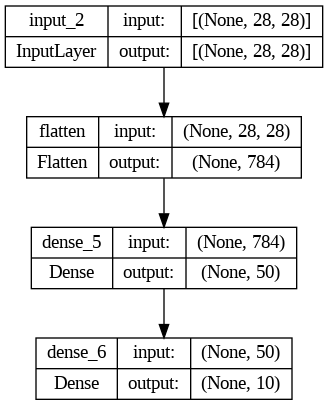

In [ ]:
tf.keras.utils.plot_model(model,"image-classification_model.png",show_shapes=True)

In [ ]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
#train
model.fit(train_mnist_features,y_mnist_train,validation_data=(test_mnist_features,y_mnist_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8124 - accuracy: 0.7980 - val_loss: 0.4138 - val_accuracy: 0.8904
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3877 - accuracy: 0.8931 - val_loss: 0.3341 - val_accuracy: 0.9068
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3366 - accuracy: 0.9054 - val_loss: 0.3061 - val_accuracy: 0.9151
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.9132 - val_loss: 0.2897 - val_accuracy: 0.9158
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2914 - accuracy: 0.9179 - val_loss: 0.2734 - val_accuracy: 0.9231
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2756 - accuracy: 0.9225 - val_loss: 0.2575 - val_accuracy: 0.9285
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2605 - accuracy: 0.9273 - val_loss: 0.2456 - val_accuracy:

In [ ]:
# Time Distributed
from keras.layers import TimeDistributed

In [ ]:
input_sequences=tf.keras.Input(shape=(10,28,28))
processed_sequences=tf.keras.layers.TimeDistributed(model)(input_sequences)
processed_sequences

<KerasTensor: shape=(None, 10, 10) dtype=float32 (created by layer 'time_distributed')>

In [ ]:
house_data_input=tf.keras.Input(shape=(128,),name="house_data")
x=tf.keras.layers.Dense(64,activation='relu')(house_data_input)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
block1_output=tf.keras.layers.Dense(32,activation='relu')(x)

house_pictures_input=tf.keras.Input(shape=(320,320,3),name="house_pictures")
y=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(house_pictures_input)
y=tf.keras.layers.Conv2D(64,3,activation='relu',padding='same')(y)
flatten_layer_house=tf.keras.layers.Flatten()
block2_output=flatten_layer_house(y)

input_feature=tf.keras.layers.concatenate([block1_output,block2_output])

In [ ]:
input_feature

<KerasTensor: shape=(None, 6553632) dtype=float32 (created by layer 'concatenate')>

In [ ]:
predict_price=x=tf.keras.layers.Dense(1,activation='relu',name='price')(input_feature)
time_sale=x=tf.keras.layers.Dense(2,activation='softmax',name='time_sale')(input_feature)
model=tf.keras.Model(inputs=[house_data_input,house_pictures_input],outputs=[predict_price,time_sale])


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 house_data (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 house_pictures (InputLayer  [(None, 320, 320, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 dense_7 (Dense)             (None, 64)                   8256      ['house_data[0][0]']          
                                                                                                  
 conv2d_3 (Conv2D)           (None, 320, 320, 64)         1792      ['house_pictures[0][0]']

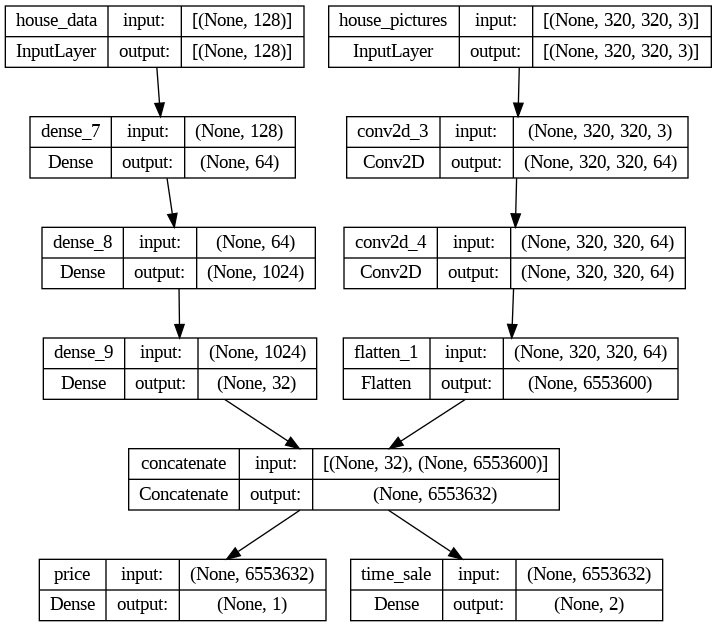

In [ ]:
tf.keras.utils.plot_model(model,"House_sale_model.png",show_shapes=True)

In [ ]:
# Keras SubClass API
import tensorflow as tf
from tensorflow import keras


In [ ]:
help(tf.random_normal_initializer())

Help on RandomNormal in module tensorflow.python.ops.init_ops_v2 object:

class RandomNormal(Initializer)
 |  RandomNormal(mean=0.0, stddev=0.05, seed=None)
 |  
 |  Initializer that generates tensors with a normal distribution.
 |  
 |  Initializers allow you to pre-specify an initialization strategy, encoded in
 |  the Initializer object, without knowing the shape and dtype of the variable
 |  being initialized.
 |  
 |  Examples:
 |  
 |  >>> def make_variables(k, initializer):
 |  ...   return (tf.Variable(initializer(shape=[k], dtype=tf.float32)),
 |  ...           tf.Variable(initializer(shape=[k, k], dtype=tf.float32)))
 |  >>> v1, v2 = make_variables(3,
 |  ...                         tf.random_normal_initializer(mean=1., stddev=2.))
 |  >>> v1
 |  <tf.Variable ... shape=(3,) ... numpy=array([...], dtype=float32)>
 |  >>> v2
 |  <tf.Variable ... shape=(3, 3) ... numpy=
 |  ...
 |  >>> make_variables(4, tf.random_uniform_initializer(minval=-1., maxval=1.))
 |  (<tf.Variable...sh

In [ ]:
class Linear(keras.layers.Layer):
  def __init__(self, units=32):
    super(Linear,self).__init__()
    self.units=units

  def build(self,input_shape):
    # x_output=w*input+b
    w_init=tf.random_normal_initializer()
    self.w=tf.Variable(initial_value=w_init(shape=(input_shape[-1],self.units),dtype='float32'),
                       trainable=True) # False,
    b_init=tf.zeros_initializer()
    self.b=tf.Variable(initial_value=b_init(shape=(self.units,),dtype='float32'),
                       trainable=True) # False,
  def call(self,inputs):
    return tf.matmul(inputs,self.w)+self.b


In [ ]:
linear_layer=Linear(32)
y=linear_layer(x)
y

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'linear')>

In [ ]:
linear_layer.weights


[<tf.Variable 'linear/Variable:0' shape=(2, 32) dtype=float32, numpy=
 array([[-0.02802451, -0.11503088,  0.08596772,  0.01630092,  0.03308333,
          0.02309838, -0.03489463,  0.09537332, -0.00958161, -0.05703542,
         -0.02887407,  0.03720806, -0.02975405,  0.1087774 , -0.03595096,
         -0.00832356, -0.02683648,  0.0682419 ,  0.02917802, -0.0293613 ,
         -0.0432415 ,  0.03648765,  0.09390005, -0.0143591 ,  0.00588095,
         -0.01006384, -0.07170509, -0.03626823,  0.02329736,  0.07654756,
         -0.0724457 , -0.11631256],
        [ 0.06381094,  0.03781619, -0.04005982, -0.0362322 ,  0.05900881,
          0.03103069,  0.07851138, -0.00916799, -0.04887377,  0.03581287,
          0.04404794,  0.13533293, -0.00304413,  0.05790692,  0.05438199,
          0.08767818,  0.06161917,  0.03519804, -0.08186295,  0.04048241,
         -0.04130156, -0.01110759, -0.02328475, -0.09115862, -0.07860088,
          0.06167897,  0.03036593, -0.07270885, -0.03846202,  0.07803842,
      

In [ ]:
linear_layer.w

<tf.Variable 'linear/Variable:0' shape=(2, 32) dtype=float32, numpy=
array([[-0.02802451, -0.11503088,  0.08596772,  0.01630092,  0.03308333,
         0.02309838, -0.03489463,  0.09537332, -0.00958161, -0.05703542,
        -0.02887407,  0.03720806, -0.02975405,  0.1087774 , -0.03595096,
        -0.00832356, -0.02683648,  0.0682419 ,  0.02917802, -0.0293613 ,
        -0.0432415 ,  0.03648765,  0.09390005, -0.0143591 ,  0.00588095,
        -0.01006384, -0.07170509, -0.03626823,  0.02329736,  0.07654756,
        -0.0724457 , -0.11631256],
       [ 0.06381094,  0.03781619, -0.04005982, -0.0362322 ,  0.05900881,
         0.03103069,  0.07851138, -0.00916799, -0.04887377,  0.03581287,
         0.04404794,  0.13533293, -0.00304413,  0.05790692,  0.05438199,
         0.08767818,  0.06161917,  0.03519804, -0.08186295,  0.04048241,
        -0.04130156, -0.01110759, -0.02328475, -0.09115862, -0.07860088,
         0.06167897,  0.03036593, -0.07270885, -0.03846202,  0.07803842,
        -0.10571458,

In [ ]:
linear_layer.b

<tf.Variable 'linear/Variable:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [ ]:
# Custom Linear Layer
x=tf.ones((2,2))
linear_layer_custom=Linear(32)
y=linear_layer_custom(x)
y

<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[ 0.0989393 ,  0.03243762,  0.07318448,  0.04951208,  0.1436367 ,
         0.03686955, -0.07354813,  0.05195027, -0.0669075 ,  0.01314161,
        -0.10360803, -0.00019049,  0.05873092, -0.04668004,  0.01476723,
        -0.05507409,  0.04781815, -0.07161725,  0.07298827,  0.07873999,
         0.07810424,  0.02746682,  0.06262644,  0.07368276,  0.03864618,
         0.04355669,  0.01140934,  0.03089904,  0.00825205,  0.05738655,
         0.1318928 , -0.00574396],
       [ 0.0989393 ,  0.03243762,  0.07318448,  0.04951208,  0.1436367 ,
         0.03686955, -0.07354813,  0.05195027, -0.0669075 ,  0.01314161,
        -0.10360803, -0.00019049,  0.05873092, -0.04668004,  0.01476723,
        -0.05507409,  0.04781815, -0.07161725,  0.07298827,  0.07873999,
         0.07810424,  0.02746682,  0.06262644,  0.07368276,  0.03864618,
         0.04355669,  0.01140934,  0.03089904,  0.00825205,  0.05738655,
         0.1318928 , -0.00574396]], dtyp

In [ ]:
# Custom MLPBlock Layer
class MLPLayer(keras.layers.Layer):
  def __init__(self):
    super(MLPLayer,self).__init__()
    self.linear_1=Linear(32)
    self.linear_2=Linear(32)
    self.linear_3=Linear(1)
  def call(self,inputs):
    x=self.linear_1(inputs)
    x=tf.nn.relu(x)
    x=self.linear_2(x)
    x=tf.nn.relu(x)
    return x

mlp=MLPLayer()
y=mlp(x)
y





<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[0.0000000e+00, 6.9571482e-03, 0.0000000e+00, 1.6383886e-02,
        3.5382626e-03, 3.4471098e-03, 0.0000000e+00, 4.0772077e-02,
        0.0000000e+00, 0.0000000e+00, 9.4252834e-03, 5.6881905e-03,
        0.0000000e+00, 3.5260819e-02, 1.7913878e-02, 3.4023799e-02,
        8.4503936e-03, 1.1333692e-02, 7.9349913e-03, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.4350230e-03, 0.0000000e+00, 9.6791657e-05,
        1.2015645e-02, 6.6136629e-03, 0.0000000e+00, 3.4679712e-03],
       [0.0000000e+00, 6.9571482e-03, 0.0000000e+00, 1.6383886e-02,
        3.5382626e-03, 3.4471098e-03, 0.0000000e+00, 4.0772077e-02,
        0.0000000e+00, 0.0000000e+00, 9.4252834e-03, 5.6881905e-03,
        0.0000000e+00, 3.5260819e-02, 1.7913878e-02, 3.4023799e-02,
        8.4503936e-03, 1.1333692e-02, 7.9349913e-03, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00

In [ ]:
# SubClassing Model
# Customize_Mnist Data_Layer_add_loss_add_layers_getconfig... of_Model

class MNISTMODEL(keras.Model):
  def __init__(self,number_class=10):
    super(MNISTMODEL,self).__init__()
    self.number_class=number_class
    self.flatten_1=keras.layers.Flatten()
    self.dropout=keras.layers.Dropout(0.1)
    self.dense_1=keras.layers.Dense(50,activation="relu")
    self.dense_2=keras.layers.Dense(10,activation="softmax")

  def call(self,inputs,training=False):
    x=self.flatten_1(inputs)
    x=self.dense_1(x)
    if training:
      x=self.dropout(x,training=training)
    x=self.dense_2(x)
    return x


mnist=tf.keras.datasets.mnist
(X_mnist_train,y_mnist_train),(X_mnist_test,y_mnist_test)=mnist.load_data()
train_mnist_features=normalize_grayscale(X_mnist_train)
test_mnist_features=normalize_grayscale(X_mnist_test)
mymnistmodel=MNISTMODEL(10)
mymnistmodel.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
mymnistmodel.fit(X_mnist_train,y_mnist_train,validation_data=(test_mnist_features,y_mnist_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 47.9130 - accuracy: 0.1550 - val_loss: 2.3049 - val_accuracy: 0.1060
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1509 - accuracy: 0.1779 - val_loss: 2.3123 - val_accuracy: 0.1010
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1622 - accuracy: 0.1774 - val_loss: 2.3188 - val_accuracy: 0.1029
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2139 - accuracy: 0.1512 - val_loss: 2.3051 - val_accuracy: 0.1032
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2594 - accuracy: 0.1446 - val_loss: 2.3009 - val_accuracy: 0.1161
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2280 - accuracy: 0.1574 - val_loss: 2.3093 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2493 - accuracy: 0.1408 - val_loss: 2.3063 - val_accuracy

### KERAS PREPROCESSING

In [24]:
# IMAGE,SEQUENCE,TEXT,...
# TIME series Data: Stock Exchange History(5 days ago -> predict price Bid/Ask on next week,...)
import numpy as np
stock_price_history=np.array([i for i in range(100)])
stock_price_history

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.preprocessing.text import one_hot


In [30]:
data_gen=TimeseriesGenerator(stock_price_history,targets=stock_price_history,length=2,shuffle=False,reverse=False,batch_size=5)
data_gen

In [31]:
print(f'length:',len(data_gen))

length: 20


In [32]:
for i in range(len(data_gen)):
  x,y=data_gen[i]
  print("x: ",x)
  print("y: ",y)

x:  [[0 1]
 [1 2]
 [2 3]
 [3 4]
 [4 5]]
y:  [2 3 4 5 6]
x:  [[ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]
y:  [ 7  8  9 10 11]
x:  [[10 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]]
y:  [12 13 14 15 16]
x:  [[15 16]
 [16 17]
 [17 18]
 [18 19]
 [19 20]]
y:  [17 18 19 20 21]
x:  [[20 21]
 [21 22]
 [22 23]
 [23 24]
 [24 25]]
y:  [22 23 24 25 26]
x:  [[25 26]
 [26 27]
 [27 28]
 [28 29]
 [29 30]]
y:  [27 28 29 30 31]
x:  [[30 31]
 [31 32]
 [32 33]
 [33 34]
 [34 35]]
y:  [32 33 34 35 36]
x:  [[35 36]
 [36 37]
 [37 38]
 [38 39]
 [39 40]]
y:  [37 38 39 40 41]
x:  [[40 41]
 [41 42]
 [42 43]
 [43 44]
 [44 45]]
y:  [42 43 44 45 46]
x:  [[45 46]
 [46 47]
 [47 48]
 [48 49]
 [49 50]]
y:  [47 48 49 50 51]
x:  [[50 51]
 [51 52]
 [52 53]
 [53 54]
 [54 55]]
y:  [52 53 54 55 56]
x:  [[55 56]
 [56 57]
 [57 58]
 [58 59]
 [59 60]]
y:  [57 58 59 60 61]
x:  [[60 61]
 [61 62]
 [62 63]
 [63 64]
 [64 65]]
y:  [62 63 64 65 66]
x:  [[65 66]
 [66 67]
 [67 68]
 [68 69]
 [69 70]]
y:  [67 68 69 70 71]
x:  [[70 71]
 [71 72]

In [38]:
model=keras.Sequential()
model.add(keras.layers.Dense(10,activation="relu",input_dim=2)) #input_dim=2=length=2(x)
model.add(keras.layers.Dense(1))
model.compile(optimizer="adam",loss="mse")
model.fit(data_gen,epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 7587.2896
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 6499.6743
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 5512.5757
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 4614.1274
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 3885.8762
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 3258.3389
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 2682.8660
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 2202.0688
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 1787.0601
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 1439.9552
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 1124.8167
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 910.7032
Ep

In [39]:
#Padding
sentences=[["I","like","book"],["I","go","to","school"]]
text_sel=set(np.concatenate(sentences))

In [40]:
text_sel

{'I', 'book', 'go', 'like', 'school', 'to'}

In [44]:
import tensorflow as tf
# LINEAR REGRESSION

# PARAMETERs
learning_rate=0.01
training_step=1000
display_step=50

# Training Data
x=np.array([3.0,5.0,6.0,10.2,14.5])
y=np.array([6.0,10.0,13.0,98.2,114.5])

# Linear Regression: y=w*x+b
# Initialize weight and bias
W= tf.Variable(np.random.randn(),name="weight")
b= tf.Variable(np.random.randn(),name="bias")
W

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=-0.54495764>

In [45]:
b

<tf.Variable 'bias:0' shape=() dtype=float32, numpy=0.061033066>